# Introducción a Data Science con Python

Este notebook es acompañado de un curso en video, que puede ser encontrado [aqui]()


## Scikit-Learn

Scikit-Learn es una biblioteca de aprendizaje automático que contiene varios algoritmos, así como métodos de preprocesamiento y evaluación. La biblioteca tiene una integración completa con NumPy y Pandas para todas sus tareas. Al igual que con las otras bibliotecas, cubriremos el material más básico, por lo que se recomienda consultar la documentación oficial en https://scikit-learn.org/stable/.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pré-procesamiento de los datos

Como vimos en la parte teórica, los datos deben estar limpios para ser proporcionados como entrada a los algoritmos de aprendizaje automático. Gran parte de esta limpieza ya se ha hecho con pandas, tratando los valores nulos y eliminando características que no ayudarían al problema. Ahora vamos a continuar con la parte final del preprocesamiento para que los datos puedan entrar en el modelo.

#### Removiendo columnas desnecesárias

Vamos continuar de donde paramos cuando trabajamos en la base del Titanic, entonces la limpieza de nulos ya fué hecha. Vamos a ver nuestra base

In [2]:
# Cargando los datos
df = pd.read_csv('data/dados_editados.csv') # Guardamos con ese nombre antes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Faixa etaria
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adulto
1,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adulto
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adulto
3,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adulto
4,6,0,3,"Moran, Mr. James",male,29.709916,0,0,330877,8.4583,Q,Adulto


La elección de los atributos que se mantienen en el modelo es un trabajo que depende del conocimiento del dominio y de la experimentación. Aquí eliminaremos algunos atributos basándonos en nuestra intuición, pero lo ideal sería consultar a un experto o probar diferentes configuraciones de atributos.

In [3]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Faixa etaria'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,38.000000,1,0,71.2833,C
1,1,3,female,26.000000,0,0,7.9250,S
2,1,1,female,35.000000,1,0,53.1000,S
3,0,3,male,35.000000,0,0,8.0500,S
4,0,3,male,29.709916,0,0,8.4583,Q


Excelente, ahora nuestros datos estan dividos en entrenamiento y validación.

#### Encoding de los datos

Tenemos que transformar todas las características en valores numéricos para poder utilizarlas en un modelo. Tomemos como ejemplo la columna de Animales. Podemos ver que sus valores son cadenas, por lo que necesitamos convertirlos de alguna manera en números. Hay varias formas de hacerlo, pero podemos destacar dos formas básicas: *one-hot encoding* y *label encoding*. Utilicemos el siguiente ejemplo:


| Salário | Altura |  Animal  | Comprou |
|:-------:|:------:|:--------:|:-------:|
| 2630,00 |   170  |   Gato   |    0    |
| 5650,00 |   169  | Cachorro |    1    |
| 1250,00 |   185  |   Peixe  |    1    |
| 8900,00 |   176  | Cachorro |    0    |


<u><i>One-hot Encoding:</i></u>

Utilizando la codificación one-hot crearemos una columna para cada posible valor que tome la variable. Tenga en cuenta que esto puede ser muy intensivo en memoria, piense en una variable como "país" que puede tomar más de 190 valores.

| Salário | Altura | Animal Gato | Animal Cachorro | Animal Peixe | Comprou |
|:-------:|:------:|:-----------:|:---------------:|:-----------:|:-------:|
| 2630,00 |   170  |      1      |        0        |      0      |    0    |
| 5650,00 |   169  |      0      |        1        |      0      |    1    |
| 1250,00 |   185  |      0      |        0        |      1      |    1    |
| 8900,00 |   176  |      0      |        1        |      0      |    0    |


<u><i>Label Encoding:</i></u>

En la codificación de etiquetas, cada valor posible de la característica se asigna a un número entero. Pero esto crea una relación de orden entre los valores que no es necesariamente deseada.

| Salário | Altura | Animal | Comprou |
|:-------:|:------:|:------:|:-------:|
| 2630,00 |   170  |    0   |    0    |
| 5650,00 |   169  |    1   |    1    |
| 1250,00 |   185  |    2   |    1    |
| 8900,00 |   176  |    1   |    0    |

Vamos aplicar a one-hot encoding en nuestros datos para que puedan ser pasados para el modelo.

In [4]:
# Primero iremos comprobar cuales atributos no son numericos
for col in df.columns:
    if df[col].dtype == object:
        print(col)

Sex
Embarked


In [5]:
# Aplicar el one-hot encoding es simple
df = pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,1,38.000000,1,0,71.2833,1,0,1,0,0
1,1,3,26.000000,0,0,7.9250,1,0,0,0,1
2,1,1,35.000000,1,0,53.1000,1,0,0,0,1
3,0,3,35.000000,0,0,8.0500,0,1,0,0,1
4,0,3,29.709916,0,0,8.4583,0,1,0,1,0


#### Dejando los datos en la misma escala
Para varios algoritmos es importante dejar los datos en la misma escala, y el kNN uno de estos casos. Para entenderlo mejor, veamos el siguiente ejemplo:

<img src="imgs/grafico_escala.png" style="width: 400px"/>

En este caso la distancia entre los dos puntos viene dada por

$$
\begin{align*}
\text{dist}(x^{(1)}, x^{(2)}) &= \sqrt{(x^{(1)}_1 - x^{(2)}_1)^2 + (x^{(1)}_2 - x^{(2)}_2)^2} \\
  &= \sqrt{(3 - 2)^2 + (10000 - 9000)^2} \\
  &= \sqrt{1 + 1000000} \\
  &= \sqrt{1000001} \\
  &= 1000.0005
\end{align*}$$

Como las escalas son muy diferentes, el primer atributo acaba por no interferir prácticamente en el resultado de la distancia. Y es importante darse cuenta de que este tipo de situaciones se dan a menudo en conjuntos de datos reales.

Hay varias formas de tratar esta situación, aquí utilizaremos una técnica llamada **Min-Max Scaling**, que transforma los datos dejándolos en el rango $[0, 1]$. La fórmula es la siguiente:


$$x^{(i)}_j \leftarrow \frac{x^{(i)}_j - min(x_j)}{max(x_j) - min(x_j)}$$

En palabras, significa que restaremos el valor más pequeño del atributo y lo dividiremos por la amplitud (diferencia entre el máximo y el mínimo).


Bien, ahora que lo entendemos podemos hacerlo para todas nuestras columnas utilizando la función interna de scikit-learn

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)

### Entrenando un modelo de aprendizaje de máquina

#### División de entrenamiento y validación
Dividiremos nuestros datos entre entrenamiento y validación, una estrategia que vimos en la parte teórica para evaluar el rendimiento de nuestro modelo.

In [8]:
# Vamos a colocar en variable cuales son nuestros features y cual es el target
target = 'Survived'
features = list(df.columns)
features.remove(target)

print('Features:', features)
print('Target:', target)

Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
Target: Survived


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df[features], df[target], 
                                                    test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(710, 10)
(178, 10)
(710,)
(178,)


#### Creando y entrenando un modelo

In [10]:
# Importando nuestro classificador
from sklearn.neighbors import KNeighborsClassifier

# Creación del modelo que utiliza un solo vecino
clf = KNeighborsClassifier(n_neighbors=1)
# Entrenamiento del modelo con datos de entrenamiento
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Veamos cómo se comporta este modelo en los datos de validación que hemos separado

In [11]:
# Así que podemos utilizar el modelo para predecir la clase de los nuevos ejemplos
y_pred = clf.predict(X_val)

In [12]:
# Importar la función que calcula la precisión
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_val, y_pred)
print('Precisión:', acc)

Acurácia: 0.7808988764044944


#### ¿Cuál es el mejor número de vecinos que podemos utilizar?

Para esta prueba utilizamos un modelo que sólo miraba la clase de su vecino más cercano. Pero puede ser que al observar la clase más frecuente en un mayor número de vinos el resultado sea mejor. ¡Vamos a probarlo!

In [13]:
# Crear una lista con todos los números de vecinos que queremos probar
n_vizinhos = np.arange(1, 11) # Array de 1 a 10

# Creación de una lista para almacenar los resultados
resultados = []

# Para cada número de vecinos
for k in n_vizinhos:
    # Creamos un nuevo modelo y lo entrenamos
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    # Predicción de los datos de validación y cálculo de la precisión
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    # Precisión de almacenamiento para el número actual de vecinos
    resultados.append(acc)

Hagamos un gráfico de la precisión para cada número de vecinos

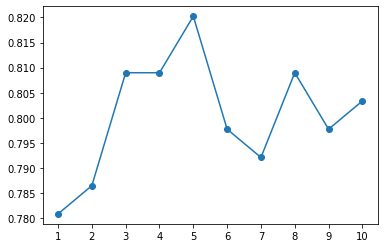

In [14]:
# En el eje de abscisas tenemos el número de vecinos y en el eje de ordenadas la precisión
plt.plot(n_vizinhos, resultados, '-o')
# Definiendo que en el eje x queremos mostrar cada número de vecinos
plt.xticks(n_vizinhos);

Esto que acabamos de hacer se llama optimización de hiperparámetros (o *hyperparameter tuning*) y es necesario para saber que estamos extrayendo lo mejor posible de nuestro modelo.

<hr>

Hemos llegado al final del contenido del curso de introducción a la ciencia de los datos. Obviamente muchas cosas no se mencionaron durante el curso porque son técnicas más avanzadas, pero el material que se expuso presenta lo suficiente para que una persona se inicie en el mundo de la ciencia de datos. Existen otras técnicas de análisis, preprocesamiento y algoritmos de aprendizaje automático, pero con lo que hemos visto aquí ya es posible atacar un problema de principio a fin.